In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('/home/maxim/work/ml/hse-ml/auto-mpg.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

# Описание датасета

**Данный датасет содержит данные о 398 автомобилях**

Для каждого автомобиля представлены такие поля, как:
* mpg (miles per gallon) - мили на галлон, величина, обратная расходу топлива
* cylinders - число цилиндров
* displacement - объём двигателя
* horsepower - мощность двигателя в лошадиных силах
* weight - масса автомобиля (в кг)
* acceleration - время разгона с места до 100 км/ч
* model year - год начала производства данной модели
* origin - место изготовления автомобиля
    * 1 - Северная Америка
    * 2 - Европа
    * 3 - Азия

In [4]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
print(data.shape)
print(data.columns)

(398, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


/home/maxim/py3-env/lib/python3.4/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


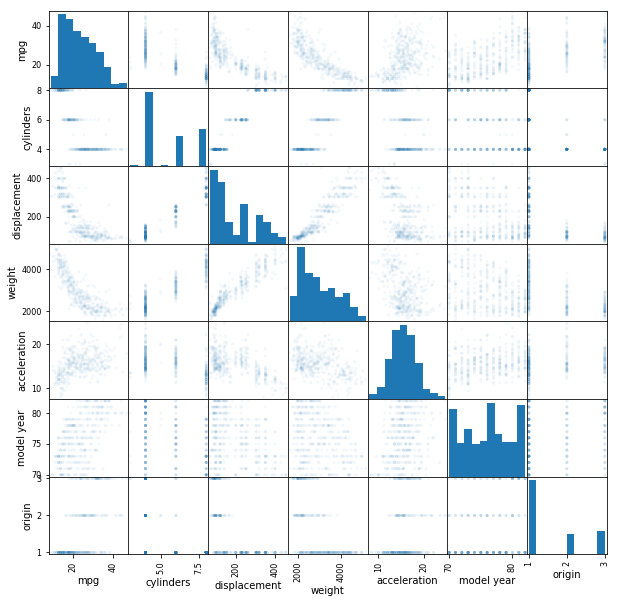

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [8]:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


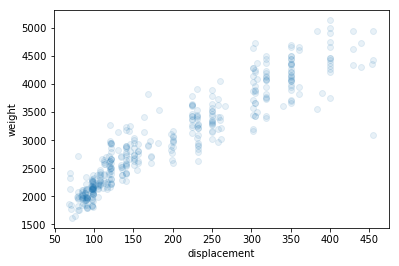

In [9]:
plt.plot(data['displacement'], data['weight'], 'o', alpha = 0.1)
plt.xlabel('displacement')
plt.ylabel('weight')
pass

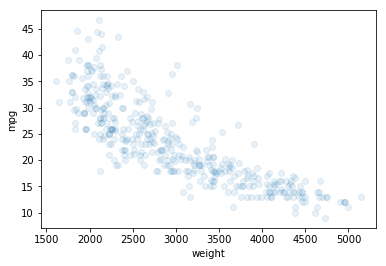

In [10]:
plt.plot(data['weight'], data['mpg'], 'o', alpha = 0.1)
plt.xlabel('weight')
plt.ylabel('mpg')
pass

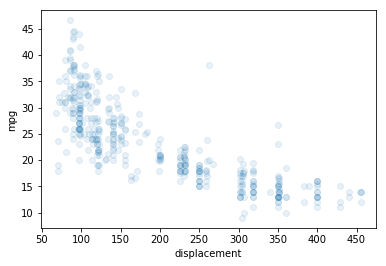

In [11]:
plt.plot(data['displacement'], data['mpg'], 'o', alpha = 0.1)
plt.xlabel('displacement')
plt.ylabel('mpg')
pass

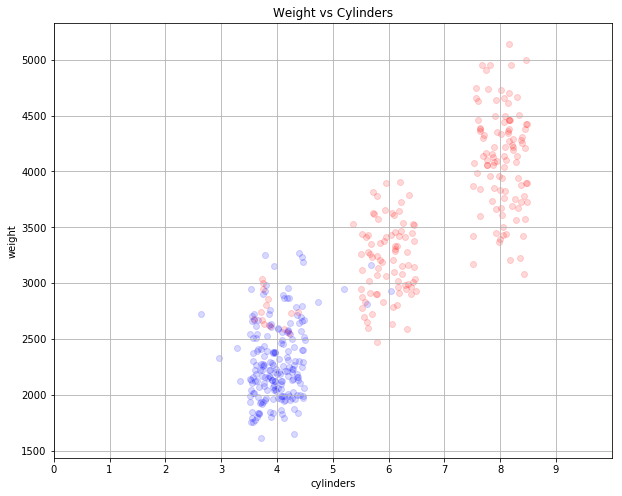

In [12]:
np.random.seed(0)
cylinders_rnd = data['cylinders'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(cylinders_rnd[data['displacement'] < 150],
            data[data['displacement'] < 150]['weight'],
            alpha = 0.15,
            label = 'V < 150',
            color = 'b')


plt.scatter(cylinders_rnd[data['displacement'] >= 150],
            data[data['displacement'] >= 150]['weight'],
            alpha = 0.15,
            label = 'V >= 150',
            color = 'r')
# plt.scatter(education_num_rnd[data['class'] == '>50K'],
#             data[data['class'] == '>50K']['age'],
#             alpha = 0.15,
#             label = '>50K',
#             color = 'r')

plt.xlabel('cylinders')
plt.xticks(range(10))
plt.xlim(0, 10)
plt.ylabel('weight')
plt.title('Weight vs Cylinders')
plt.grid()

In [13]:
data.describe(include = ['object'])

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [14]:
data.describe(include = ('all'))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [15]:
type(data['horsepower'][0])

str

In [16]:
data = data.dropna(axis = 0)

In [17]:
for elem in data['horsepower']:
    elem = int(elem)

ValueError: invalid literal for int() with base 10: '?'

In [18]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [19]:
data = data.dropna(axis = 0)

In [20]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
data['origin'] = data['origin'].apply(str)

In [22]:
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [23]:
type(data['origin'][5])

str

In [24]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['origin', 'car name']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [25]:
data = data.drop('car name', axis = 1)

In [26]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['origin']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


In [27]:
for c in categorical_columns:
    print(c, data[c].unique())

origin ['1' '3' '2']


In [28]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['origin']


In [29]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['origin_1', 'origin_2', 'origin_3'], dtype='object')


In [30]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [31]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [32]:
data_numerical.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.064796e-16,-9.091367e-17,-5.209481e-17,-1.767294e-16,-2.084323e-17,6.226480e-15,-1.273641e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850853e+00,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00,-1.623241e+00
25%,-8.258696e-01,-8.629108e-01,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01,-8.088504e-01
50%,-8.916306e-02,-8.629108e-01,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02,5.540071e-03
75%,7.116049e-01,1.482053e+00,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01,8.199306e-01
max,2.966568e+00,1.482053e+00,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00,1.634321e+00


In [33]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)

(392, 10)


In [34]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,392.000000,392.000000,392.000000
mean,-3.064796e-16,-9.091367e-17,-5.209481e-17,-1.767294e-16,-2.084323e-17,6.226480e-15,-1.273641e-15,0.625000,0.173469,0.201531
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.484742,0.379136,0.401656
min,-1.850853e+00,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00,-1.623241e+00,0.000000,0.000000,0.000000
25%,-8.258696e-01,-8.629108e-01,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01,-8.088504e-01,0.000000,0.000000,0.000000
50%,-8.916306e-02,-8.629108e-01,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02,5.540071e-03,1.000000,0.000000,0.000000
75%,7.116049e-01,1.482053e+00,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01,8.199306e-01,1.000000,0.000000,0.000000
max,2.966568e+00,1.482053e+00,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00,1.634321e+00,1.000000,1.000000,1.000000


In [35]:
X = data.drop(('mpg'), axis = 1)
y = data['mpg']
feature_names = X.columns

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

274 118


In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
#knn.set_params(n_neighbors=10)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

1.0 1.0


In [40]:
print(lin_reg.predict(X_train)[0:5])
print(y_train[0:5])

[ 0.86382963  0.66081523  1.69228013  0.24665436  0.04981437]
335    1.480342
397    0.967851
394    2.633448
29     0.455359
275   -0.825870
Name: mpg, dtype: float64
